# **Part 2a:** E-I Layer 1 Simulation

In [1]:
# Public libraries
import os

# Local libraries
import tools.network as net
import tools.simulation as sim

# Brian imports
from brian2 import ms, prefs

In [2]:
# Target for code-generation
prefs.codegen.target = 'numpy'

## Simulation Setup

### Parameters

In [3]:
# Results-storage flags
store_counts = True
store_spikes = True

# Topology
NUM_CH = 32     # Number of cochlear input-channels
d_max = 3       # Max lateral distance between E-I inputs
num_dupl = 6    # Number of E-I neuron duplicates

# Mismatch factors (standard deviation)
mismatch_w = 0.5
mismatch_tau = 0.5

mismatch_syn = {
    'I_tau':        0,
    'I_th':         mismatch_tau,
    'baseweight':   mismatch_w
}

# Training and testing
num_train = 2464
num_test = 2486

digits = ['zero', 'oh', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Path to dataset
datapath = '/home/mattias/Documents/Dataset/ti_digits_formants/'

fpath_train = datapath + 'myformants_tidigits_adults_train.mat'
fpath_test = datapath + 'myformants_tidigits_adults_test.mat'

outpath = ('Results/TIDIGITS/E-I/'
           + 'w' + str(mismatch_w)
           + '_tau' + str(mismatch_tau)
           + '_dmax'+ str(d_max)
           + '/')

# Create output directory
os.makedirs(os.path.dirname(outpath), exist_ok=True)

for digit in digits:
    os.makedirs(os.path.dirname(outpath + 'train/' + digit + '/'), exist_ok=True)
    os.makedirs(os.path.dirname(outpath + 'test/' + digit + '/'), exist_ok=True)
    

### Network Setup

Number of E-I neurons:	174


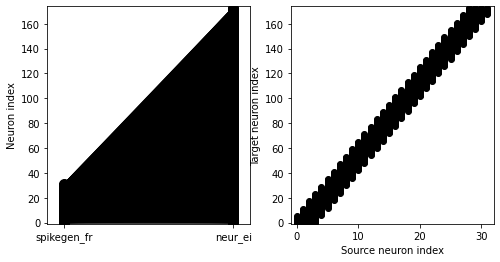

In [4]:
# Set up Brian network
network, spikegen_fr, spikemon_fr = net.ei_network(NUM_CH,
                                                   num_dupl,
                                                   d_max,
                                                   mismatch_syn)

# Get number of neurons
num_ei = network.neurongroups['neur_ei']._N
num_out = num_ei

# Print numbers of neurons
print("Number of E-I neurons:\t" + str(num_ei))

# Visualize connections
network.synapses['syn_e'].plot()

## Run with Training Data

In [5]:
sim.run_simulation(fpath_train, outpath, 'train',
                   digits, num_train,
                   network, spikegen_fr,
                   NUM_CH, num_out,
                   store_spikes, store_counts)

Digits:   0%|          | 0/11 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/224 [00:00<?, ?it/s]

## Run with Test Data

In [6]:
sim.run_simulation(fpath_test, outpath, 'test',
                   digits, num_test,
                   network, spikegen_fr,
                   NUM_CH, num_out,
                   store_spikes, store_counts)

Digits:   0%|          | 0/11 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]

Digit samples:   0%|          | 0/226 [00:00<?, ?it/s]